Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3072)           │     1,575,936 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,412,224 (13.02 MB)

 Trainable params: 3,412,224 (13.02 MB)

 Non-trainable params: 0 (0.00 B)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


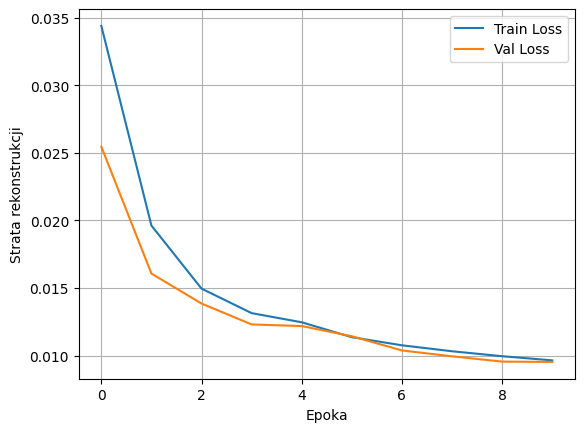

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

input_dim = 32 * 32 * 3
encoding_dim = 256

input_img = tf.keras.Input(shape=(input_dim,))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(512, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.reshape(len(x_train), input_dim) / 255.0
x_test = x_test.reshape(len(x_test), input_dim) / 255.0

history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test), verbose=0)

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoka")
plt.ylabel("Strata rekonstrukcji")
plt.legend()
plt.grid()
plt.show()